In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv",
           sep=';',
           header=0)

In [3]:
df.head()

,RecordNo,CALLDAY,QUESTDAY,hetk_hetv,DE_COUNT,teltip,DE_REG2,DE_AGEG,K15A,kshkod,...,K93_12,K93_13E,K93_13EO,K93_13,isk,SZUL,kor,súly,súly_hétk,súly_hétv
0,1,20211024,20211024,2,8,2,3,2,Debrecen,15130,...,3,-9998,,-9998,3,19,1,0.978935,,1.08734332861355
1,2,20211024,20211024,2,3,3,1,2,Gyula,5032,...,1,-9998,,-9998,3,19,1,0.994554,,1.06888189624473
2,12,20211024,20211024,2,15,3,3,3,Tiszavasvári,7597,...,2,-9998,,-9998,4,38,2,0.999357,,0.850102755096159
3,14,20211024,20211024,2,17,2,7,5,Szombathely,3009,...,1,-9998,,-9998,3,58,4,0.998004,,0.883055075846983
4,19,20211025,20211025,2,13,1,6,4,Budapest,13578,...,5,-9998,,-9998,4,48,3,0.968952,,0.983300114236723


In [4]:
print(f"Number of cities: {df['K15A'].unique().size}")

Number of cities: 447


In [5]:
df.groupby(by='K15A').size().sort_values(ascending=False)[:15]

K15A
Budapest            180
Debrecen             57
Miskolc              15
Győr                 15
Hódmezővásárhely     13
Salgótarján          11
Kecskemét             9
Nagykanizsa           8
Szombathely           8
Szekszárd             8
Göd                   8
Veszprém              7
Sopron                7
Érd                   6
Nyírbátor             6
dtype: int64

In [6]:
df.sort_values(['K15A','isk'], ascending=[True,False]).\
                                         groupby(['K15A','isk']). \
                                         size(). \
                                         sort_values(ascending=False)[:15]

K15A         isk
Budapest     4      61
             3      49
             2      47
Debrecen     3      32
Budapest     1      23
Debrecen     4      19
Salgótarján  3       8
Miskolc      4       8
Győr         4       6
             3       6
Miskolc      3       6
Kecskemét    3       5
Sopron       3       5
Szombathely  4       4
Szentes      3       4
dtype: int64

In [7]:
df.groupby(['K15A', 'K10']).size().sort_index(level=1, ascending=False)[:10]

K15A           K10
Nagymaros      11     1
Miskolc        11     1
Hatvan         11     1
Budapest       11     1
Üröm           10     1
Ököritófülpös  10     1
Zalaegerszeg   10     1
Veszprém       10     1
Veresegyház    10     1
Tiszavasvári   10     1
dtype: int64

In [8]:
corrM = df.corr()

In [9]:
df.columns[:100]

Index(['RecordNo', 'CALLDAY', 'QUESTDAY', 'hetk_hetv', 'DE_COUNT', 'teltip',
       'DE_REG2', 'DE_AGEG', 'K15A', 'kshkod', 'K15B', 'K1', 'nem', 'K7', 'K8',
       'K9', 'K10', 'K11', 'K12', 'K13', 'feor', 'K14', 'K14O', 'K16',
       'K18_0C1', 'K18_0C2', 'K18_0C3', 'K18_0C4', 'K18_0C5', 'K18_0C6',
       'K18_0C7', 'K18_0C8', 'K18_0C8O', 'K18_1', 'K18_4', 'K21', 'K23_2_2',
       'K23_2_3', 'K23_3', 'K24', 'K25_1', 'K28', 'K41', 'K42C1', 'K42C2',
       'K42C3', 'K42C4', 'K42C5', 'K42C6', 'K42C7', 'K42C8', 'K42C9', 'K42C9O',
       'K42C10', 'K43', 'K44C1', 'K44C2', 'K44C3', 'K44C4', 'K44C5', 'K44C6',
       'K44C7', 'K44C8', 'K44C9', 'K44C10', 'K44C11', 'K44C12', 'K44C12O',
       'K44C13', 'K45', 'K47_1', 'K47_2', 'K48C1', 'K48C2', 'K48C3', 'K48C3O',
       'K48C4', 'K48C5', 'K49C1', 'K49C2', 'K49C3', 'K49C4', 'K49C5', 'K49C6',
       'K49C7', 'K49C7O', 'K65', 'K67', 'K69_1', 'K69_2', 'K70', 'K71_1',
       'K71_2', 'K71_3', 'K72', 'K74', 'K75', 'K76C1', 'K76C2', 'K76C3'],
      dt

<AxesSubplot:>

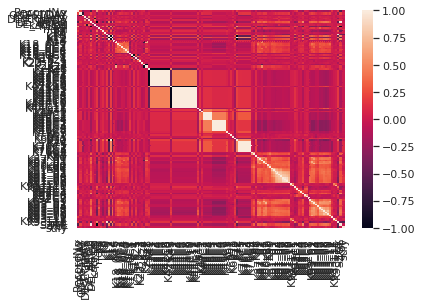

In [10]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

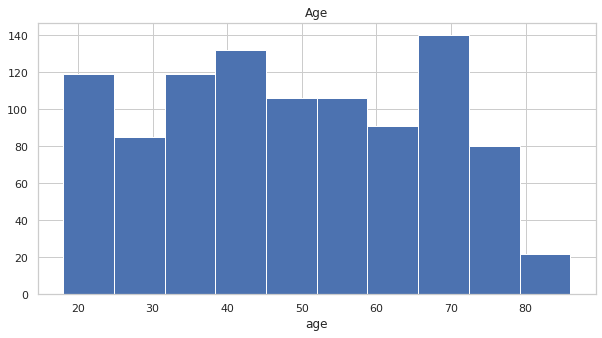

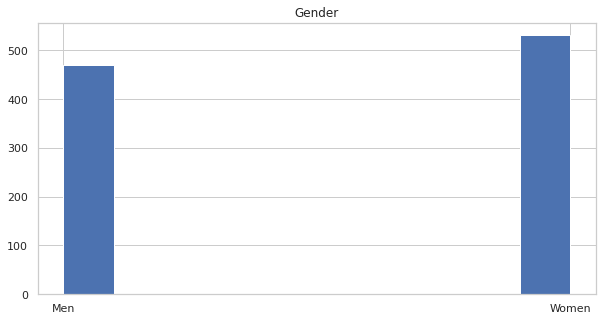

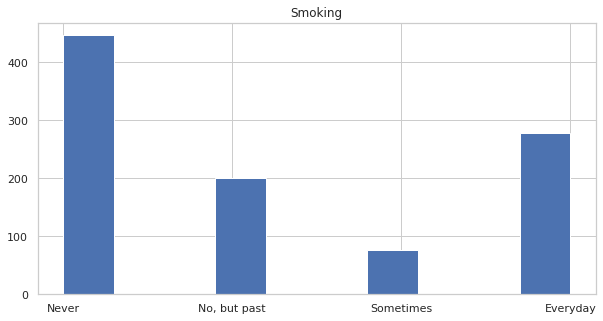

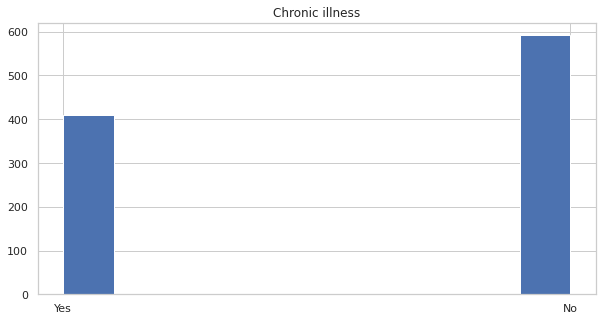

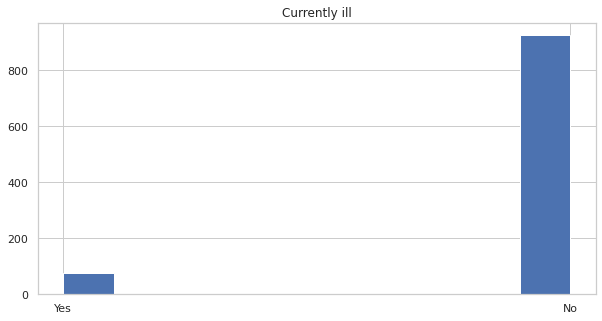

In [11]:
plt.figure(figsize=(10,5))
(2021-df['K1']).hist()
plt.xlabel("age")
plt.title("Age")
plt.show()

plt.figure(figsize=(10,5))
df['nem'].hist()
plt.xticks([1,2], labels=["Men", "Women"])
plt.title("Gender")
plt.show()

plt.figure(figsize=(10,5))
df['K7'].hist()
plt.xticks([1,2,3,4], labels=["Never", "No, but past", "Sometimes", "Everyday"])
plt.title("Smoking")
plt.show()

plt.figure(figsize=(10,5))
df['K8'].hist()
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Chronic illness")
plt.show()

plt.figure(figsize=(10,5))
df['K9'].hist()
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Currently ill")
plt.show()

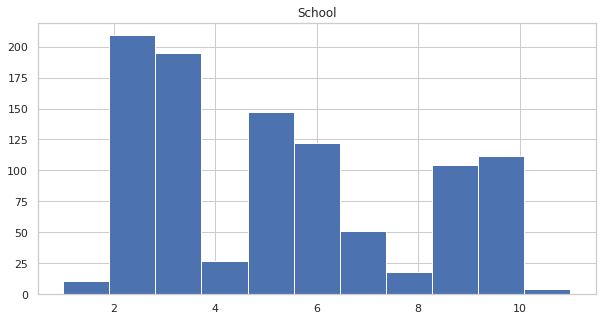

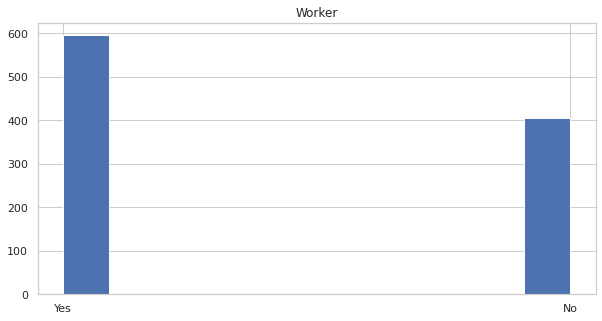

In [12]:
plt.figure(figsize=(10,5))
df['K10'].hist(bins=11)
plt.title("School")
plt.show()

plt.figure(figsize=(10,5))
df['K11'].hist(bins=11)
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Worker")
plt.show()

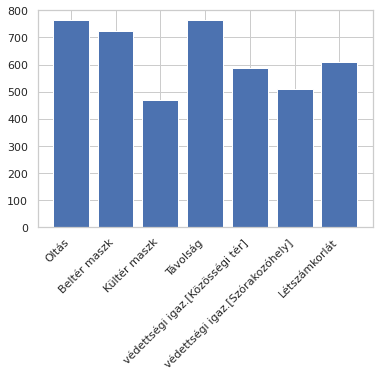

In [13]:
arr = [df["K18_0C{}".format(i)].sum() for i in range(1,8)]
labels=["Oltás", "Beltér maszk", "Kültér maszk", "Távolság", "védettségi igaz.[Közösségi tér]",
        "védettségi igaz.[Szórakozóhely]", "Létszámkorlát"]

plt.bar(range(1,8), arr)
plt.xticks(range(1,8), labels=labels, rotation=45, ha='right')
plt.show()

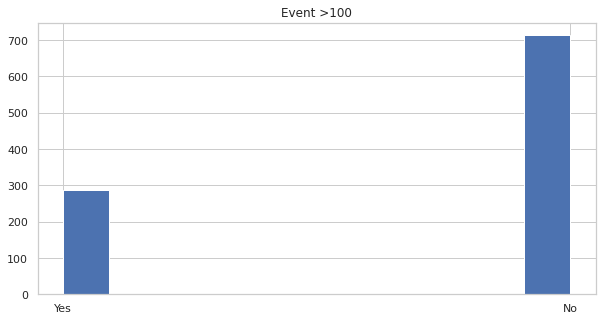

In [14]:
plt.figure(figsize=(10,5))
df['K45'].hist(bins=11)
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Event >100")
plt.show()

# Covid seriousness

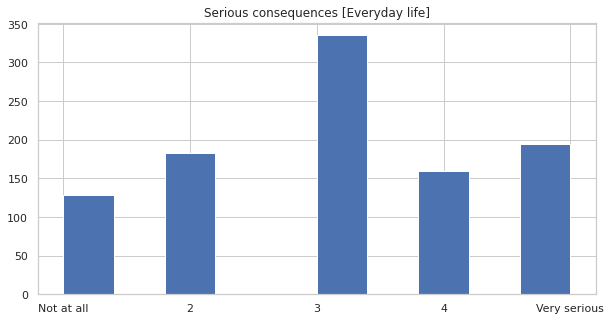

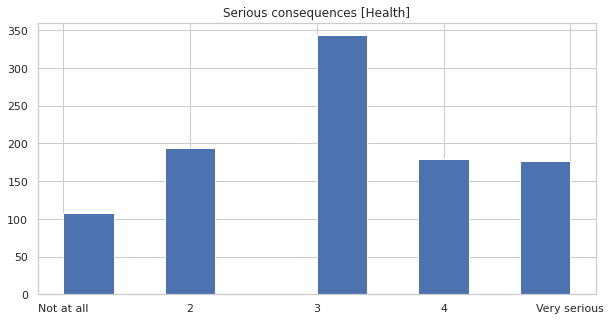

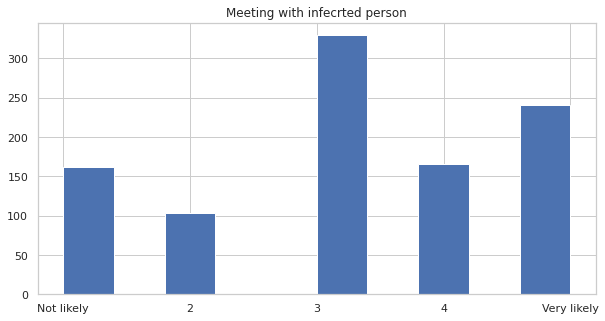

In [15]:
plt.figure(figsize=(10,5))
df['K84'].hist()
plt.xticks([1,2,3,4,5], labels=["Not at all", "2", "3", "4", "Very serious"])
plt.title("Serious consequences [Everyday life]")
plt.show()

plt.figure(figsize=(10,5))
df['K85'].hist()
plt.xticks([1,2,3,4,5], labels=["Not at all", "2", "3", "4", "Very serious"])
plt.title("Serious consequences [Health]")
plt.show()

plt.figure(figsize=(10,5))
df['K86'].hist()
plt.xticks([1,2,3,4,5], labels=["Not likely", "2", "3", "4", "Very likely"])
plt.title("Meeting with infecrted person")
plt.show()

# Protective actions effectivity

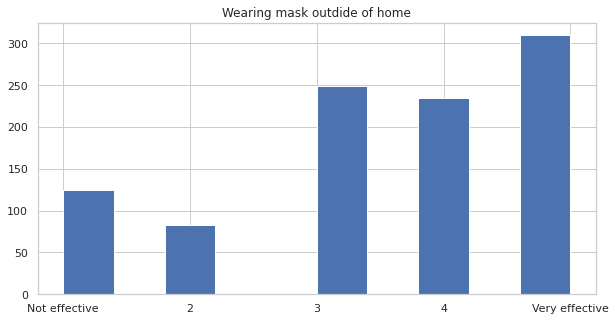

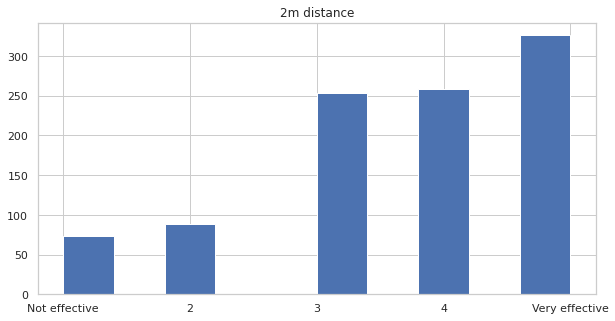

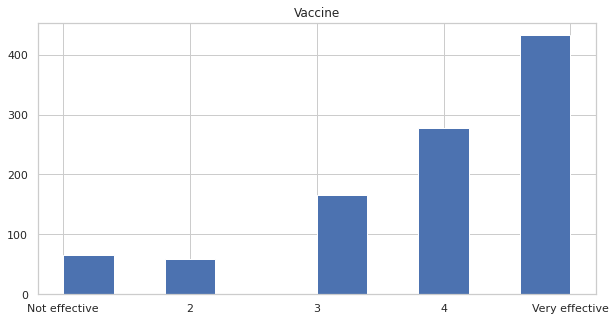

In [16]:
# TODO: barh

plt.figure(figsize=(10,5))
df['K87_01'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Wearing mask outdide of home")
plt.show()

plt.figure(figsize=(10,5))
df['K87_02'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("2m distance")
plt.show()

plt.figure(figsize=(10,5))
df['K87_03'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Vaccine")
plt.show()



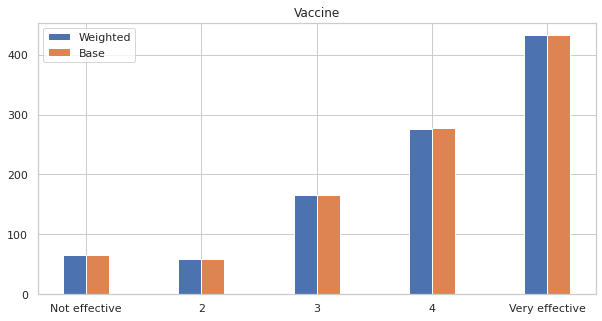

In [17]:
plt.figure(figsize=(10,5))

w= 0.1
x = df.groupby(['K87_03'])['súly'].sum()
plt.bar(x.index-w, x.array, label="Weighted", width = 2*w)

x = df.groupby(['K87_03']).size()
plt.bar(x.index+w, x.array, label="Base", width = 2*w)

plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Vaccine")
plt.legend()
plt.show()

In [18]:
def bar_feature(df, columns, x_ticks, x_labels, title, labels, figsize=(15,5), rot = 0):
    plt.figure(figsize=figsize)
    
    n = len(columns)
    w = 0.5*(1.0/n)
    for i,(column,label) in enumerate(zip(columns, labels)):
        x = df.groupby([column])['súly'].sum()
        plt.bar(x.index-(((n-1)/2-i))*w, x.array, label=label, width = w)

    plt.xticks(x_ticks, labels=x_labels, rotation=rot, ha='right')
    plt.title(title)
    plt.legend()
    plt.show()

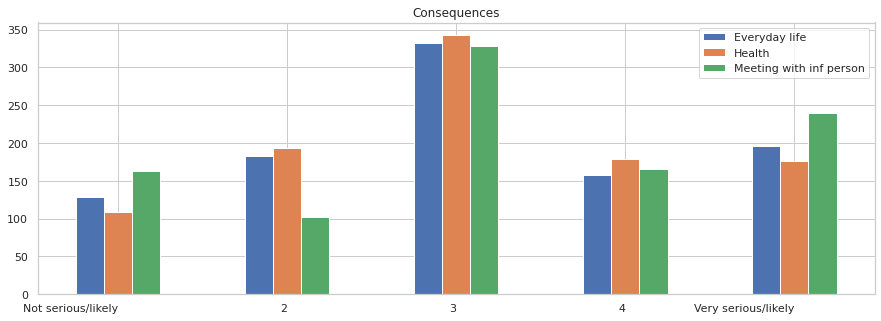

In [19]:
bar_feature(df, ['K84', 'K85', 'K86'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Not serious/likely", "2", "3", "4", "Very serious/likely"],
            title="Consequences",
            labels=['Everyday life', 'Health', "Meeting with inf person"])


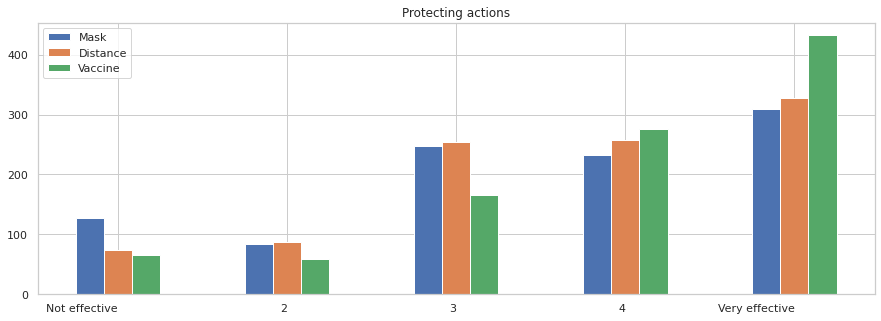

In [20]:
bar_feature(df, ['K87_01', 'K87_02', 'K87_03'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Not effective", "2", "3", "4", "Very effective"],
            title="Protecting actions",
            labels=['Mask', 'Distance', "Vaccine"])

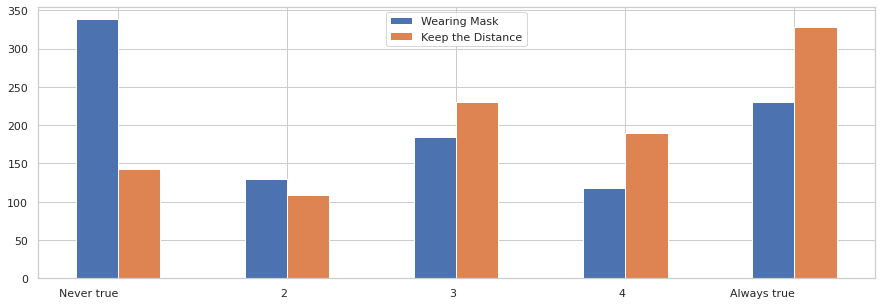

In [21]:
bar_feature(df, ['K88_01', 'K88_02'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Never true", "2", "3", "4", "Always true"],
            title="",
            labels=['Wearing Mask', 'Keep the Distance'])

No handles with labels found to put in legend.


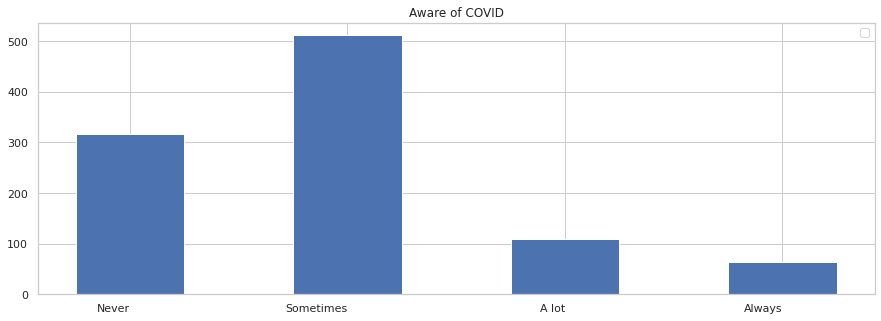

In [22]:
bar_feature(df, ['K89'],
            x_ticks = [1,2,3,4],
            x_labels=["Never", "Sometimes", "A lot", "Always"],
            title="Aware of COVID",
            labels=[None])

No handles with labels found to put in legend.


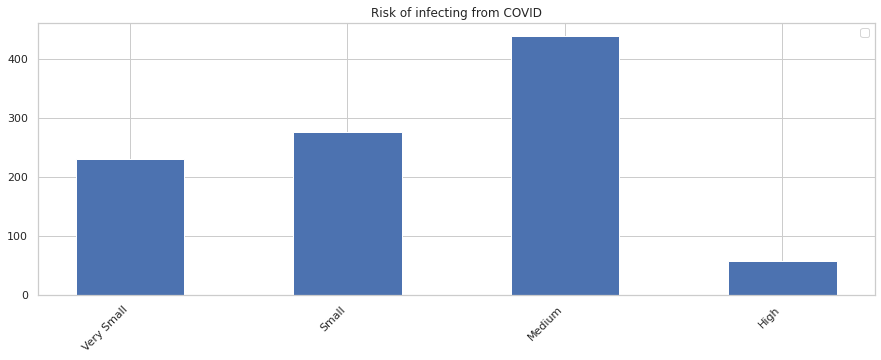

In [23]:
bar_feature(df, ['K90'],
            x_ticks = [1,2,3,4],
            x_labels=["Very Small", "Small", "Medium", "High"],
            title="Risk of infecting from COVID",
            labels=[None], rot=45)

In [31]:
import numpy as np

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        #ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

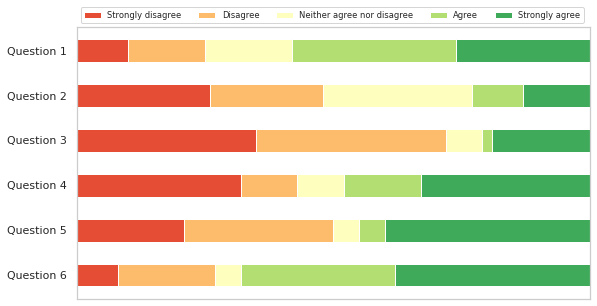

In [32]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

survey(results, category_names)

In [30]:
import matplotlib
matplotlib.__version__

'3.3.4'